Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5736 - loss: 0.6779 - val_accuracy: 0.6518 - val_loss: 0.6305
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 0.6397 - val_accuracy: 0.6513 - val_loss: 0.6218
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.6223 - val_accuracy: 0.6642 - val_loss: 0.6138
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.6146 - val_accuracy: 0.6910 - val_loss: 0.6047
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.6161 - val_accuracy: 0.6656 - val_loss: 0.6011
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6844 - loss: 0.5983 - val_accuracy: 0.6757 - val_loss: 0.5971
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.6044 - val_accuracy: 0.6877 - val_loss: 0.5899
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6709 - loss: 0.5959 - val_accuracy: 0.6757 - 

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7877 - loss: 0.4225 - val_accuracy: 0.8367 - val_loss: 0.3487
Epoch 52/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7873 - loss: 0.4258 - val_accuracy: 0.8358 - val_loss: 0.3434
Epoch 53/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7889 - loss: 0.4054 - val_accuracy: 0.8118 - val_loss: 0.3513
Epoch 54/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8033 - loss: 0.3983 - val_accuracy: 0.8113 - val_loss: 0.3450
Epoch 55/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7960 - loss: 0.4087 - val_accuracy: 0.8390 - val_loss: 0.3485
Epoch 56/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.4570 - val_accuracy: 0.7744 - val_loss: 0.4038
Epoch 57/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7720 - loss: 0.4503 - val_accuracy: 0.8261 - val_loss: 0.3526
Epoch 58/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.4033 - val_accuracy: 0.8464 - val_lo

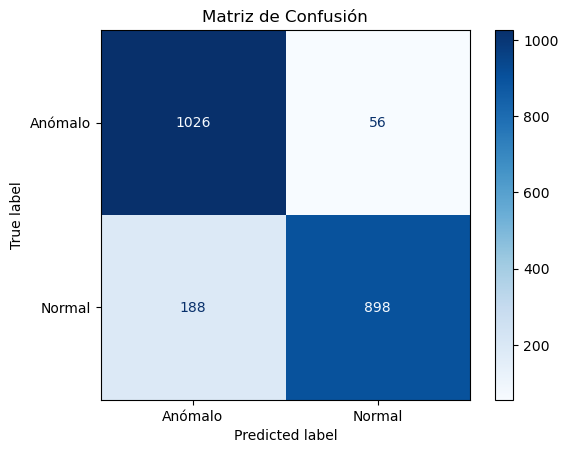

In [354]:
#matriz de confusion
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna matriz basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['matriz'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['matriz']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.show()


Epoch 1/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5937 - loss: 0.6735 - val_accuracy: 0.6444 - val_loss: 0.6307
Epoch 2/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 0.6404 - val_accuracy: 0.6467 - val_loss: 0.6301
Epoch 3/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: 0.6358 - val_accuracy: 0.6587 - val_loss: 0.6120
Epoch 4/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.6304 - val_accuracy: 0.6767 - val_loss: 0.6106
Epoch 5/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 0.6194 - val_accuracy: 0.6642 - val_loss: 0.6023
Epoch 6/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6755 - loss: 0.6108 - val_accuracy: 0.6757 - val_loss: 0.5986
Epoch 7/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6732 - loss: 0.6121 - val_accuracy: 0.6757 - val_loss: 0.5928
Epoch 8/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.6028 - val_accuracy: 0.6651 - val_loss:

Epoch 52/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8210 - loss: 0.3814 - val_accuracy: 0.8312 - val_loss: 0.3342
Epoch 53/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8163 - loss: 0.3758 - val_accuracy: 0.8316 - val_loss: 0.3326
Epoch 54/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.3881 - val_accuracy: 0.8413 - val_loss: 0.3267
Epoch 55/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.3871 - val_accuracy: 0.8312 - val_loss: 0.3260
Epoch 56/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.3685 - val_accuracy: 0.8404 - val_loss: 0.3240
Epoch 57/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.3760 - val_accuracy: 0.8312 - val_loss: 0.3217
Epoch 58/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.3775 - val_accuracy: 0.8326 - val_loss: 0.3193
Epoch 59/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.3554 - val_accuracy: 0.8413 - v

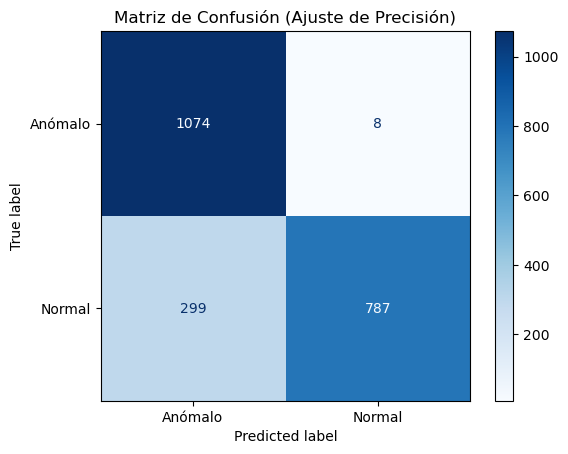

In [352]:
# MATRIZ CONFUSION Se modificado el algoritmo para ajustar el entrenamiento y priorizar una precisión de 0.88.
# Los cambios incluyen limitar el número de épocas a 70
# este llevar a tesis porque es mejor y explicar por que
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronales basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['RedesNeuronales']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo con un ajuste para priorizar la clase Anómalo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo con un número limitado de épocas para ajustar precisión
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión (Ajuste de Precisión)')
plt.show()
